In [7]:
library(scRNAtoolVis)
library(ggplot2)
library(dplyr)
library(ggvenn)

In [2]:
ca <- read.csv('CA_diffgene_FDR0.05.csv')
cin3 <- read.csv('CIN3_diffgene_FDR0.05.csv')
pca <- read.csv('PCA_diffgene_FDR0.05.csv')
pcin3 <- read.csv('PCIN3_diffgene_FDR0.05.csv')

In [3]:
ca$cluster <- 'CA'
pca$cluster <- 'PCA'
cin3$cluster <- 'CIN3'
pcin3$cluster <- 'PCIN3'

In [4]:
df <- rbind(ca, pca,cin3, pcin3)
df$cluster <- factor(df$cluster, levels=c('CA', 'CIN3', 'PCIN3', 'PCA'))

In [5]:
df_sorted <- df %>%
  arrange(p_val_adj, avg_log2FC) %>%
  group_by(cluster) %>%
  slice_head(n = 7)

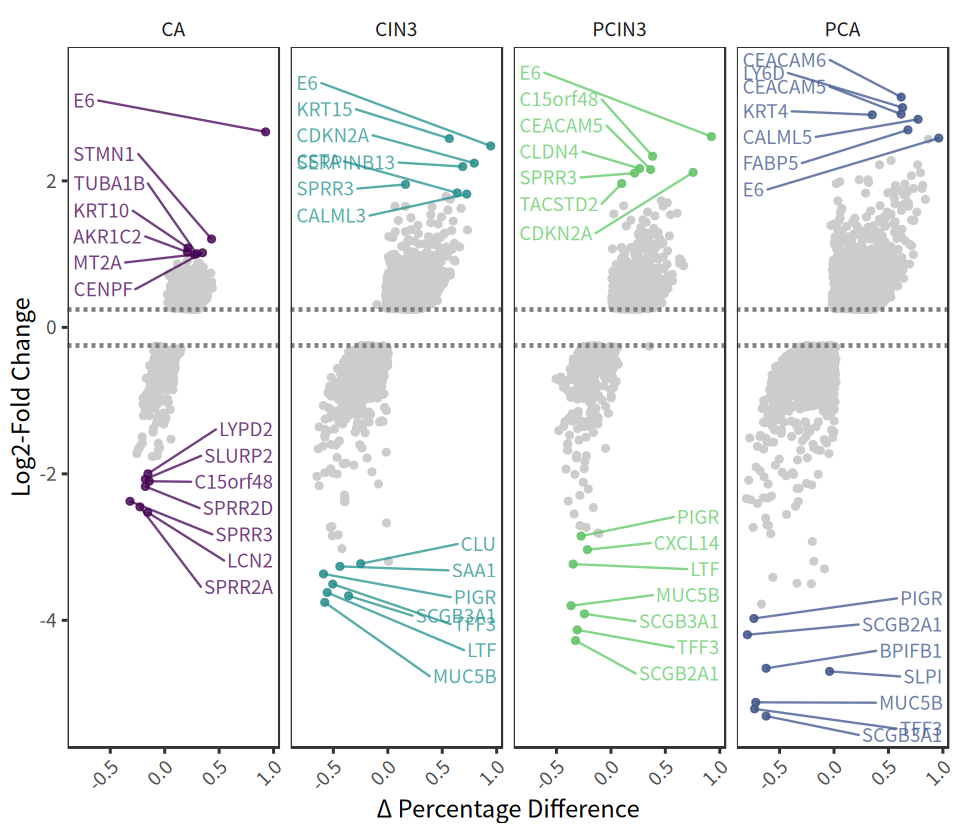

In [8]:
options(repr.plot.width=8, repr.plot.height=7)
p <- markerVolcano(markers = df,
              topn = 7,
              #ownGene = 'DNMT1',
              labelCol = c("#440154BF", "#21908CBF",  "#5DC863BF", "#3B528BBF"),
             )

p

In [9]:
vnlist = list()
vnlist$CA <- subset(ca, group=="up")$gene
vnlist$PCA <- subset(pca, group=="up")$gene
vnlist$CIN3 <- subset(cin3, group=="up")$gene
vnlist$PCIN3 <- subset(pcin3, group=="up")$gene

overlap <- vnlist$CA[vnlist$CA %in% vnlist$PCA]
overlap <- overlap[overlap %in% vnlist$CIN3]
overlap <- overlap[overlap %in% vnlist$PCIN3]

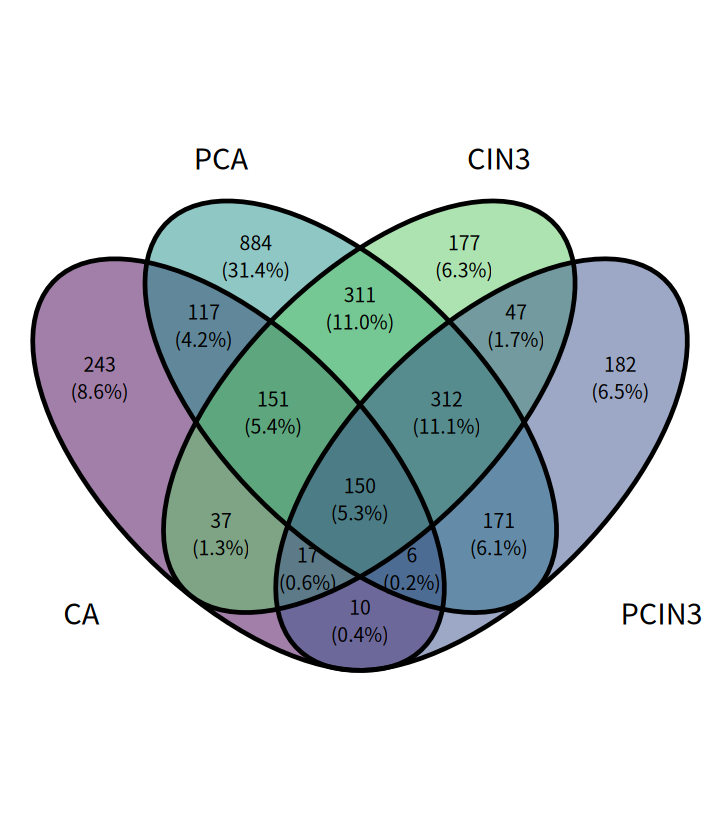

In [10]:
options(repr.plot.width=6, repr.plot.height=7)
p <- ggvenn(data = vnlist, 
       fill_color=c("#440154BF", "#21908CBF",  "#5DC863BF", "#3B528BBF"))

p
#ggsave('HPV_pm_DE_marker_vnn.pdf', p, w=6, h=7)

In [11]:
#write.csv(overlap, 'DE_overlap_150.txt', row.names=FALSE, quote=FALSE)